# # Project Goal: Forecasting gold price for next 30 days
##  Business Objective:
Understand the underlying structure in your dataset and come up with a suitable forecasting model which can effectively forecast gold prices for next 30 days

### 1. Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as smf
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import altair as alt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import os

In [2]:
gold=pd.read_csv(r"C:\Users\Trupti Kendre\Downloads\Gold_data.csv")
gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


# Exploratory Data Analysis(EDA)
### 3. Data Understanding

In [3]:
gold.shape

(2182, 2)

In [4]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [5]:
gold.dtypes

date      object
price    float64
dtype: object

### Date is objective type data

In [6]:
gold.isna().sum()

date     0
price    0
dtype: int64

There are no null values in the dataset

In [7]:
gold.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [8]:
gold.describe(include='all')

,date,price
count,2182,2182.000000
unique,2182,NaN
top,2016-01-01,NaN
freq,1,NaN
mean,NaN,3284.450046
std,NaN,719.564434
min,NaN,2252.600000
25%,NaN,2697.020000
50%,NaN,2879.800000
75%,NaN,4147.325000


In [9]:
gold.value_counts()

date        price 
2016-01-01  2252.6    1
2019-12-28  3464.2    1
2019-12-22  3375.1    1
2019-12-23  3398.0    1
2019-12-24  3431.0    1
                     ..
2017-12-22  2598.7    1
2017-12-21  2599.0    1
2017-12-20  2597.1    1
2017-12-19  2591.5    1
2021-12-21  4346.5    1
Length: 2182, dtype: int64

# 4. Data Preparation
### 1.Since date columnn is objective type data need to change it to type date time

In [10]:
gold['date']=pd.to_datetime(gold['date'])
gold

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [11]:
gold.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [12]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


### 2. Chaining index to the data in order to make it proper time series data

In [13]:
gold_new=pd.read_csv(r"C:\Users\Trupti Kendre\Downloads\Gold_data.csv", header=0, index_col=0,squeeze=True,parse_dates=True)

In [14]:
gold_new

date
2016-01-01    2252.60
2016-01-02    2454.50
2016-01-03    2708.10
2016-01-04    2577.80
2016-01-05    2597.75
               ...   
2021-12-17    4394.40
2021-12-18    4389.50
2021-12-19    4389.50
2021-12-20    4354.10
2021-12-21    4346.50
Name: price, Length: 2182, dtype: float64

In [15]:
gold_new.shape

(2182,)

### 3. Box plot for checking outliers present in my dataset

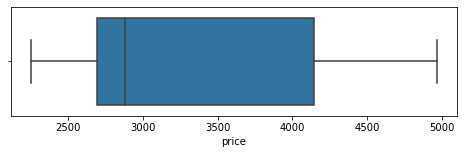

In [16]:
plt.figure(figsize=(8,2))
ax=sns.boxplot(x=gold['price'],whis=1.5)

There are no outliers present in my dataset

# Visualization of data distribution
### 1. Histogram

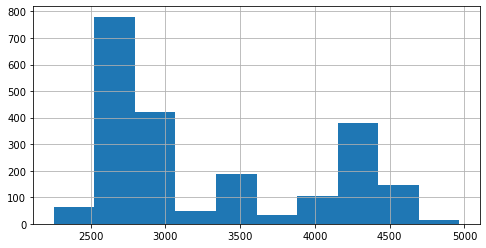

In [17]:
plt.figure(figsize=(8,4))
gold_new.hist()
plt.show()

### 2. plot

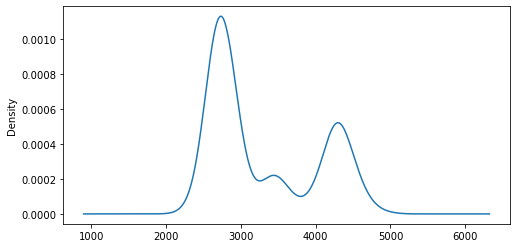

In [18]:
plt.figure(figsize=(8,4))
gold_new.plot(kind='kde')
plt.show()

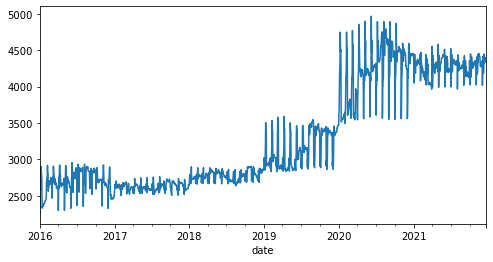

In [19]:
plt.figure(figsize=(8,4))
gold_new.plot()
plt.show()

The growth in the price has much more of an exponential growth

In [20]:
gold['price']=round(gold['price'])
gold['Year']=gold['date'].dt.year
gold['Month_of_Year']=gold['date'].dt.month

### Boxplot for all the month throughout all the years

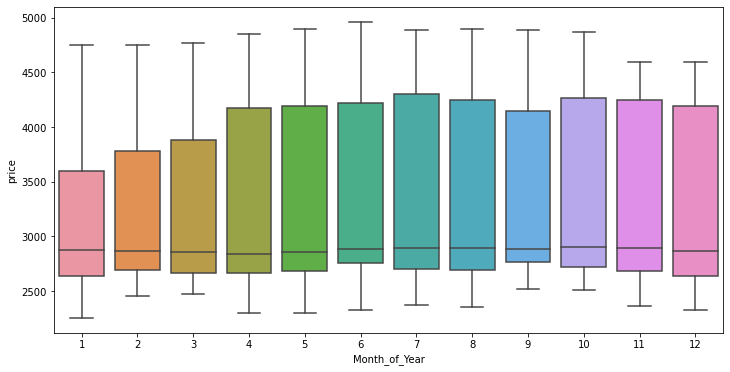

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month_of_Year', y='price',data=gold)
plt.show()

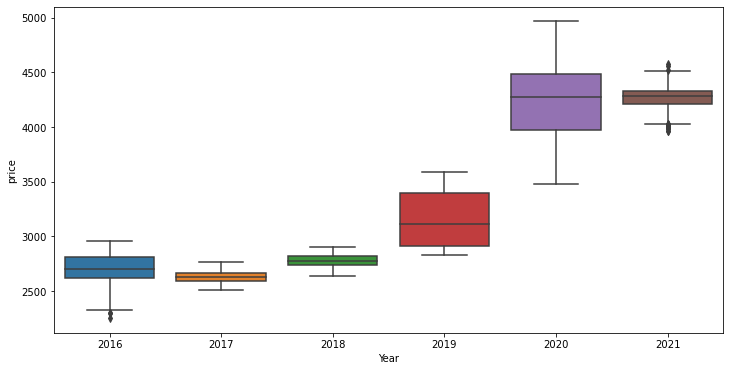

In [22]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Year', y='price',data=gold)
plt.show()

# Time series decomposition plot
### * To find the clear trend
### * To find the seasonality(Additive/Multiplicative)

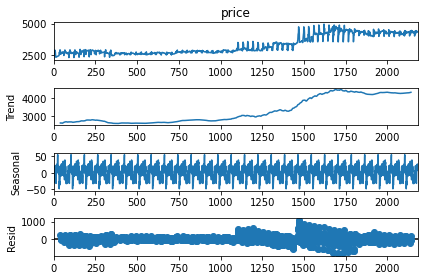

In [23]:
decompose_ts_add = seasonal_decompose(gold['price'], period=80 )
decompose_ts_add.plot()
plt.show()

In [24]:
gold["date"]= pd.to_datetime(gold["date"])
indexdata=gold.set_index(["date"])

In [25]:
resample = indexdata.resample('M') #M for monthly basis
quarterly_mean_sales = resample.mean()
quarterly_mean_sales

,price,Year,Month_of_Year
date,,,
2016-01-31,2495.870968,2016.0,1.0
2016-02-29,2688.689655,2016.0,2.0
2016-03-31,2682.903226,2016.0,3.0
2016-04-30,2677.800000,2016.0,4.0
2016-05-31,2677.709677,2016.0,5.0
...,...,...,...
2021-08-31,4264.870968,2021.0,8.0
2021-09-30,4207.533333,2021.0,9.0
2021-10-31,4289.129032,2021.0,10.0


In [26]:
quarterly_mean_sales.head(10)

,price,Year,Month_of_Year
date,,,
2016-01-31,2495.870968,2016.0,1.0
2016-02-29,2688.689655,2016.0,2.0
2016-03-31,2682.903226,2016.0,3.0
2016-04-30,2677.800000,2016.0,4.0
2016-05-31,2677.709677,2016.0,5.0
2016-06-30,2745.633333,2016.0,6.0
2016-07-31,2779.645161,2016.0,7.0
2016-08-31,2792.225806,2016.0,8.0
2016-09-30,2792.633333,2016.0,9.0


# Checking for stationality
### Dickey fuller test

In [27]:
test_result=adfuller(quarterly_mean_sales['price'])

In [28]:
def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [29]:
adfuller_test(quarterly_mean_sales['price'])

ADF Test Statistic : -0.18173231421114763
p-value : 0.9406643356884156
#Lags Used : 0
Number of Observations Used : 71
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [30]:
quarterly_mean_sales['price'] = quarterly_mean_sales['price'] - quarterly_mean_sales['price'].shift(1)

In [31]:
quarterly_mean_sales['price'].shift(1)

date
2016-01-31           NaN
2016-02-29           NaN
2016-03-31    192.818687
2016-04-30     -5.786429
2016-05-31     -5.103226
                 ...    
2021-08-31     45.843011
2021-09-30    -43.838710
2021-10-31    -57.337634
2021-11-30     81.595699
2021-12-31     38.537634
Freq: M, Name: price, Length: 72, dtype: float64

In [32]:
quarterly_mean_sales['price']=quarterly_mean_sales['price']-quarterly_mean_sales['price'].shift(12)

In [33]:
quarterly_mean_sales.head(10)

,price,Year,Month_of_Year
date,,,
2016-01-31,NaN,2016.0,1.0
2016-02-29,NaN,2016.0,2.0
2016-03-31,NaN,2016.0,3.0
2016-04-30,NaN,2016.0,4.0
2016-05-31,NaN,2016.0,5.0
2016-06-30,NaN,2016.0,6.0
2016-07-31,NaN,2016.0,7.0
2016-08-31,NaN,2016.0,8.0
2016-09-30,NaN,2016.0,9.0


# Retest again dickey fuller test

In [34]:
adfuller_test(quarterly_mean_sales['price'].dropna())

ADF Test Statistic : -3.472136116801481
p-value : 0.008732206177923134
#Lags Used : 11
Number of Observations Used : 47
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


### Splitting Data

In [35]:
train=gold[0:1528]
test=gold[1528:]

In [36]:
train.tail(10)

,date,price,Year,Month_of_Year
1518,2020-02-27,3773.0,2020,2
1519,2020-02-28,3670.0,2020,2
1520,2020-02-29,3673.0,2020,2
1521,2020-03-01,3565.0,2020,3
1522,2020-03-02,3611.0,2020,3
1523,2020-03-03,3845.0,2020,3
1524,2020-03-04,3979.0,2020,3
1525,2020-03-05,4128.0,2020,3
1526,2020-03-06,4106.0,2020,3
1527,2020-03-07,4255.0,2020,3


In [37]:
test

,date,price,Year,Month_of_Year
1528,2020-03-08,4770.0,2020,3
1529,2020-03-09,4554.0,2020,3
1530,2020-03-10,4473.0,2020,3
1531,2020-03-11,4573.0,2020,3
1532,2020-03-12,4365.0,2020,3
...,...,...,...,...
2177,2021-12-17,4394.0,2021,12
2178,2021-12-18,4390.0,2021,12
2179,2021-12-19,4390.0,2021,12
2180,2021-12-20,4354.0,2021,12


# Holt Winters Model

In [38]:
hwmodel=ExponentialSmoothing (train.price,trend='add',seasonal='mul',seasonal_periods=52).fit()

In [39]:
test_pred=hwmodel.forecast(654)

In [40]:
test_pred

1528    4245.569840
1529    4256.337036
1530    4240.602276
1531    4211.518644
1532    4232.377774
           ...     
2177    5691.130389
2178    5756.592218
2179    5636.257750
2180    5349.215892
2181    5557.699165
Length: 654, dtype: float64

<AxesSubplot:>

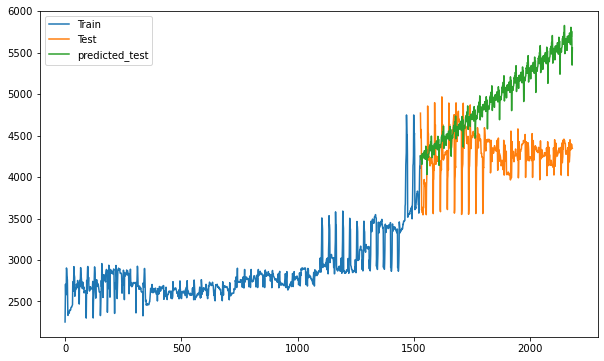

In [41]:
train['price'].plot(legend = True,label='Train',figsize=(10,6))
test['price'].plot(legend = True,label='Test')
test_pred.plot(legend = True,label='predicted_test')


In [42]:
train2=gold[0:2152]
test2=gold[2152:]




In [43]:
train2.tail(10)

,date,price,Year,Month_of_Year
2142,2021-11-12,4334.0,2021,11
2143,2021-11-13,4451.0,2021,11
2144,2021-11-14,4451.0,2021,11
2145,2021-11-15,4456.0,2021,11
2146,2021-11-16,4421.0,2021,11
2147,2021-11-17,4444.0,2021,11
2148,2021-11-18,4423.0,2021,11
2149,2021-11-19,4410.0,2021,11
2150,2021-11-20,4404.0,2021,11
2151,2021-11-21,4404.0,2021,11


In [44]:
test2

,date,price,Year,Month_of_Year
2152,2021-11-22,4311.0,2021,11
2153,2021-11-23,4275.0,2021,11
2154,2021-11-24,4274.0,2021,11
2155,2021-11-25,4278.0,2021,11
2156,2021-11-26,4316.0,2021,11
2157,2021-11-27,4319.0,2021,11
2158,2021-11-28,4319.0,2021,11
2159,2021-11-29,4304.0,2021,11
2160,2021-11-30,4277.0,2021,11
2161,2021-12-01,4353.0,2021,12


In [45]:
hwmodel=ExponentialSmoothing (train2.price,trend='add',seasonal='mul',seasonal_periods=52).fit()

In [46]:
test2_pred=hwmodel.forecast(30)

In [47]:
test2_pred

2152    4295.406051
2153    4229.610825
2154    4151.734610
2155    4197.946986
2156    4166.906381
2157    4131.549656
2158    4104.988451
2159    4100.303788
2160    4118.523020
2161    4113.938230
2162    4172.480903
2163    4168.796998
2164    4203.577325
2165    4193.325318
2166    4174.065203
2167    4251.671821
2168    4308.873622
2169    4356.948528
2170    4391.681829
2171    4402.871295
2172    4413.150610
2173    4422.790752
2174    4492.109626
2175    4586.247593
2176    4640.666601
2177    4797.515556
2178    4814.436741
2179    4798.103953
2180    4779.043602
2181    4723.028094
dtype: float64

<AxesSubplot:>

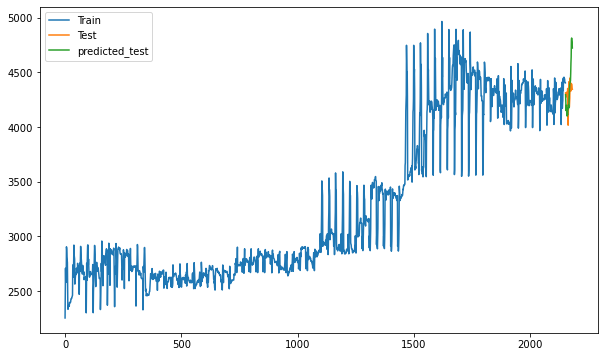

In [48]:
train2['price'].plot(legend = True,label='Train',figsize=(10,6))
test2['price'].plot(legend = True,label='Test')
test2_pred.plot(legend = True,label='predicted_test')


In [49]:
train3=gold[0:2182]
test3=gold[2182:]

In [50]:
train3.tail(10)

,date,price,Year,Month_of_Year
2172,2021-12-12,4334.0,2021,12
2173,2021-12-13,4351.0,2021,12
2174,2021-12-14,4328.0,2021,12
2175,2021-12-15,4349.0,2021,12
2176,2021-12-16,4400.0,2021,12
2177,2021-12-17,4394.0,2021,12
2178,2021-12-18,4390.0,2021,12
2179,2021-12-19,4390.0,2021,12
2180,2021-12-20,4354.0,2021,12
2181,2021-12-21,4346.0,2021,12


In [51]:
test3

,date,price,Year,Month_of_Year


In [52]:
hwmodel=ExponentialSmoothing (train3.price,trend='add',seasonal='mul',seasonal_periods=52).fit()

In [53]:
test3_pred=hwmodel.forecast(30)

In [54]:
test3_pred

2182    4300.197419
2183    4260.533718
2184    4271.965015
2185    4249.660370
2186    4297.536057
2187    4298.111764
2188    4265.969147
2189    4242.334892
2190    4247.058525
2191    4286.998444
2192    4273.521261
2193    4256.916860
2194    4190.166451
2195    4213.336637
2196    4262.548047
2197    4272.091524
2198    4388.182074
2199    4404.646611
2200    4372.258815
2201    4317.172147
2202    4223.690582
2203    4121.770715
2204    4028.268445
2205    3969.437889
2206    3904.466781
2207    3930.878125
2208    3915.519676
2209    3880.694194
2210    3853.660128
2211    3843.202823
dtype: float64

<AxesSubplot:>

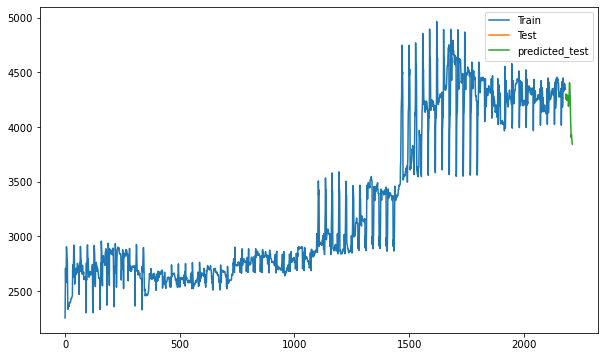

In [55]:
train3['price'].plot(legend = True,label='Train',figsize=(10,6))
test3['price'].plot(legend = True,label='Test')
test3_pred.plot(legend = True,label='predicted_test')



# MAPE

In [56]:
from sklearn.metrics import mean_squared_error
def RMSE(pred,org):
    temp=mean_squared_error(org,pred)
    return np.sqrt(temp).round(2)

In [57]:
# Formula of Error written once by using a function MAPE (Mean Absolute % Error)

def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100  
    return np.mean(temp)

In [58]:
hwe_model_mul_add = ExponentialSmoothing(train["price"],seasonal="mul",trend="add",seasonal_periods=52).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.price)

16.77756569515964

In [59]:
hwe_model_mul_add = ExponentialSmoothing(train2["price"],seasonal="mul",trend="add",seasonal_periods=52).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test2.index[0],end = test2.index[-1])
MAPE(pred_hwe_mul_add,test2.price)

4.1221756028444805

In [60]:
hwe_model_mul_add = ExponentialSmoothing(train2["price"],seasonal="mul",trend="add",seasonal_periods=52).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test2.index[0],end = test2.index[-1])
RMSE(pred_hwe_mul_add,test2.price)

215.41

# building arima model

In [61]:
# separate out a validation dataset (90%-training data and 10% test data)
split_point = len(gold_new) - 218
dataset, validation = gold_new[0:split_point], gold_new[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 1964, Validation 218


In [62]:
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [63]:
X

array([2252.6, 2454.5, 2708.1, ..., 4336.7, 4336.7, 4387.9], dtype=float32)

In [64]:
 from math import sqrt
    #walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
ar_rmse = sqrt(mean_squared_error(test, predictions))
print('Ar_RMSE: %.3f' % ar_rmse)

>Predicted=2679.600, Expected=2768.700
>Predicted=2768.700, Expected=2829.800
>Predicted=2829.800, Expected=2819.900
>Predicted=2819.900, Expected=2859.500
>Predicted=2859.500, Expected=2763.100
>Predicted=2763.100, Expected=2764.200
>Predicted=2764.200, Expected=2761.500
>Predicted=2761.500, Expected=2761.500
>Predicted=2761.500, Expected=2797.000
>Predicted=2797.000, Expected=2797.100
>Predicted=2797.100, Expected=2781.800
>Predicted=2781.800, Expected=2779.700
>Predicted=2779.700, Expected=2779.500
>Predicted=2779.500, Expected=2779.500
>Predicted=2779.500, Expected=2779.700
>Predicted=2779.700, Expected=2807.400
>Predicted=2807.400, Expected=2802.500
>Predicted=2802.500, Expected=2775.400
>Predicted=2775.400, Expected=2760.100
>Predicted=2760.100, Expected=2773.800
>Predicted=2773.800, Expected=2775.100
>Predicted=2775.100, Expected=2775.100
>Predicted=2775.100, Expected=2701.700
>Predicted=2701.700, Expected=2731.800
>Predicted=2731.800, Expected=2761.900
>Predicted=2761.900, Expe

In [65]:
gold_validation = gold['price'][1746:]

In [66]:
x_train=gold['price'][:1746]
x_test=gold['price'][1746:]

In [67]:
model_gold=ARIMA(x_train,order=(1,1,1))
gold_new=model_gold.fit(disp=0)
print(gold_new.summary())
fc, se, conf=gold_new.forecast(436,alpha=0.05)

def forecast_accuracy(forecast,actual):
    mape=(np.mean(np.abs(forecast - actual)/np.abs(actual))*100).round(2)
    rmse=np.sqrt(((forecast-actual)**2).mean())
    return({'Mean Absolute Percentage Error(%) ':mape,
           'Root Mean Squared Error':rmse})
forecast_accuracy(fc, gold_validation.values)

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1745
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10668.952
Method:                       css-mle   S.D. of innovations            109.377
Date:                Wed, 27 Jul 2022   AIC                          21345.903
Time:                        10:22:55   BIC                          21367.762
Sample:                             1   HQIC                         21353.985
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0981      0.360      3.054      0.002       0.393       1.803
ar.L1.D.price     0.7995      0.016     48.648      0.000       0.767       0.832
ma.L1.D.price    -0.9730      0.005   -1

{'Mean Absolute Percentage Error(%) ': 9.36,
 'Root Mean Squared Error': 440.9721036459632}